## лаба 4_1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def cauchyProblem(x, y, y_der):
    return (1 + 2*(math.tan(x))**2) * y


def pureFunction(x):
    return 1 / math.cos(x) + math.sin(x) + x/math.cos(x)


def g(x, y, k):
    return k


def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

In [37]:
def analytical(f, a, b, h):
    x = [i for i in np.arange(a, b + h, h)]
    y = [f(i) for i in x]
    return x, y


def euler(f, a, b, h, y0, y_der):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = y_der
    for i in range(n):
        k += h * f(x[i], y[i], k)
        y.append(y[i] + h * g(x[i], y[i], k))

    return x, y


def rungeKutt(f, a, b, h, y0, y_der):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = [y_der]
    for i in range(n):
        K1 = h * g(x[i], y[i], k[i])
        L1 = h * f(x[i], y[i], k[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, k[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, k[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, k[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, k[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, k[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, k[i] + L3)
        y.append(y[i] + (K1 + 2 * K2 + 2 * K3 + K4) / 6)
        k.append(k[i] + (L1 + 2 * L2 + 2 * L3 + L4) / 6)
    return x, y, k


def adams(f, x, y, k, h):
    n = len(x)
    x = x[:4]
    y = y[:4]
    k = k[:4]
    for i in range(3, n - 1):
        k.append(k[i] + h * (55 * f(x[i], y[i], k[i]) -
                             59 * f(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * f(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * f(x[i - 3], y[i - 3], k[i - 3])) / 24)

        y.append(y[i] + h * (55 * g(x[i], y[i], k[i]) -
                             59 * g(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * g(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * g(x[i - 3], y[i - 3], k[i - 3])) / 24)
        x.append(x[i] + h)
    return x, y


def rungeRomberg(dict_):
    k = dict_[0]['h'] / dict_[1]['h']
    Y1 = [yi for xi, yi in zip(dict_[0]['Euler']['x'], dict_[0]['Euler']['y']) if xi in dict_[1]['Euler']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Euler']['x'], dict_[1]['Euler']['y']) if xi in dict_[0]['Euler']['x']]
    euler = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Euler']['x'] if xi in dict_[1]['Euler']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(euler)):
        euler[i] = abs(euler[i] - Y_ex[i])
    euler = np.around(euler, 5)

    Y1 = [yi for xi, yi in zip(dict_[0]['Runge']['x'], dict_[0]['Runge']['y']) if xi in dict_[1]['Runge']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Runge']['x'], dict_[1]['Runge']['y']) if xi in dict_[0]['Runge']['x']]
    runge = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Runge']['x'] if xi in dict_[1]['Runge']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(runge)):
        runge[i] = abs(runge[i] - Y_ex[i])
    runge = np.around(runge, 4)

    Y1 = [yi for xi, yi in zip(dict_[0]['Adams']['x'], dict_[0]['Adams']['y']) if xi in dict_[1]['Adams']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Adams']['x'], dict_[1]['Adams']['y']) if xi in dict_[0]['Adams']['x']]
    adams = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Adams']['x'] if xi in dict_[1]['Adams']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(adams)):
        adams[i] = abs(adams[i] - Y_ex[i])
    adams = np.around(adams, 5)
    
    return {'Euler': euler, 'Runge': runge, 'Adams': adams}

In [38]:
def show(res, pure, h):
    n = len(res)
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        plt.scatter(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4, label='Euler method')
        plt.plot(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4)
        plt.scatter(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4, label='Runge-Kutta method')
        plt.plot(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4)
        plt.scatter(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4, label='Adams method')
        plt.plot(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4)
        plt.scatter(pure[i][0], pure[i][1], color='k', alpha=0.4, label='Pure function')
        plt.plot(pure[i][0], pure[i][1], color='k', alpha=0.4)

        plt.legend(loc='best')
        plt.title('h{0} = '.format(i + 1) + str(h[i]))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
    plt.show()


Current step: 0.1
Euler method:
x = 0.0, y = 1
x = 0.1, y = 1.21
x = 0.2, y = 1.4323436225234243
x = 0.3, y = 1.6701878201777323
x = 0.4, y = 1.9279302652517722
x = 0.5, y = 2.2118445219909497
x = 0.6, y = 2.53107956510948
x = 0.7, y = 2.899318494070596
x = 0.8, y = 3.3376890216087194
x = 0.9, y = 3.8802058307166094
x = 1.0, y = 4.584759937010959

Runge-Kutta method:
x = 0.0, y = 1
x = 0.1, y = 1.2053558848003372
x = 0.2, y = 1.4230746865035093
x = 0.3, y = 1.6562950149293596
x = 0.4, y = 1.9094007345127069
x = 0.5, y = 2.1886601608512426
x = 0.6, y = 2.503237304716082
x = 0.7, y = 2.8668802742184742
x = 0.8, y = 3.300906314380946
x = 0.9, y = 3.8398396668522015
x = 1.0, y = 4.542955682075453

Adams method:
x = 0.0, y = 1
x = 0.1, y = 1.2053558848003372
x = 0.2, y = 1.4230746865035093
x = 0.3, y = 1.6562950149293596
x = 0.4, y = 1.909227717820485
x = 0.5, y = 2.188063076985114
x = 0.6, y = 2.5019332878126423
x = 0.7, y = 2.864233667966701
x = 0.8, y = 3.295698979604449
x = 0.9, y = 3.8

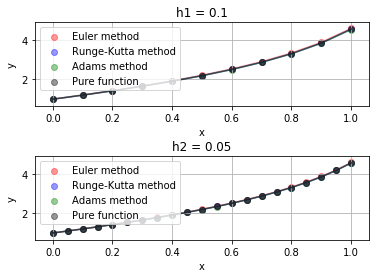

In [39]:
a = 0
b = 1
h = 0.1
y0 = 1
y_der = 2
res = []
pure = []
steps = [h, h/2]
for h in steps:
    print(f"Current step: {h}")
    print("Euler method:")
    x_eul, y_eul = euler(cauchyProblem, a, b, h, y0, y_der)
    for x, y in zip(x_eul, y_eul):
        print(f'x = {round(x, 4)}, y = {y}')
    print()

    print("Runge-Kutta method:")
    x_rung, y_rung, k_rung = rungeKutt(cauchyProblem, a, b, h, y0, y_der)
    for x, y in zip(x_rung, y_rung):
        print(f'x = {round(x, 4)}, y = {y}')
    print()

    print("Adams method:")
    x_ad, y_ad = adams(cauchyProblem, x_rung, y_rung, k_rung, h)
    for x, y in zip(x_ad, y_ad):
        print(f'x = {round(x, 4)}, y = {y}')
    print()

    print("Analytical method:")
    x_anal, y_anal = analytical(pureFunction, a, b, h)
    for x, y in zip(x_anal, y_anal):
        print(f'x = {round(x, 4)}, y = {y}')
    print()

    pure.append((x_anal, y_anal))
    res.append({
                "h": h,
                "Euler": {'x': x_eul, 'y': y_eul},
                "Runge": {'x': x_rung, 'y': y_rung},
                "Adams": {'x': x_ad, 'y': y_ad},
                })

err = rungeRomberg(res)
print("Euler error: {0}".format(err['Euler']))
print("Runge error: {0}".format(err['Runge']))
print("Adams error: {0}".format(err['Adams']))

show(res, pure, steps)

## лаба 4_2

In [45]:
PI = math.pi

def func(x, y, y_der):
    return 2 * (1 + (math.tan(x) ** 2)) * y


def g(x, y, k):
    return k


def p(x):
    return 0


def q(x):
    return - 2 * (1 + (math.tan(x) ** 2))


def pureFunction(x):
    return 1 + math.tan(x*(x+1))


def f(x):
    return 0


In [46]:
def first(x, y, x0):
    i = 0
    while i < len(x) - 1 and x[i + 1] < x0:
        i += 1
    return (y[i + 1] - y[i]) / (x[i + 1] - x[i])


def stop(y, y1, eps):
    if abs(y[-1] - y1) > eps:
        return True
    else:
        return False


def newN(n_last, n, ans_last, ans, b, y1):
    x, y = ans_last[0], ans_last[1]
    phi_last = y[-1] - y1
    x, y = ans[0], ans[1]
    phi = y[-1] - y1
    return n - (n - n_last) / (phi - phi_last) * phi


def shootingMethod(a, b, y0, y1, h, eps):
    n_last = 1
    n = 0.8
    y_der = n_last
    ans_last = rungeKutt(func, a, b, h, n_last, y_der)[:2]
    y_der = n
    ans = rungeKutt(func, a, b, h, n, y_der)[:2]

    while stop(ans[1], y1, eps):
        n, n_last = newN(n_last, n, ans_last, ans, b, y1), n
        ans_last = ans
        y_der = n
        ans = rungeKutt(func, a, b, h, y0, y_der)[:2]

    return ans


def tma(a, b, c, d, shape):
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))
    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]
    return x[:-1]


def finiteDifferenceMethod(a, b, alpha, beta, delta, gamma, y0, y1, h):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    A = [0] + [1 - p(x[i]) * h / 2 for i in range(0, n - 1)] + [-gamma]
    B = [alpha * h - beta] + [q(x[i]) * h ** 2 - 2 for i in range(0, n - 1)] + [delta * h + gamma]

    C = [beta] + [1 + p(x[i]) * h / 2 for i in range(0, n - 1)] + [0]
    D = [y0 * h] + [f(x[i]) * h ** 2 for i in range(0, n - 1)] + [y1 * h]

    y = tma(A, B, C, D, len(A))
    return x, y


In [47]:
def rungeRomberg(ans, exact):
    k = ans[0]['h'] / ans[1]['h']
    Y1 = [yi for xi, yi in zip(ans[0]['Shooting']['x'], ans[0]['Shooting']['y']) if xi in ans[1]['Shooting']['x']]
    Y2 = [yi for xi, yi in zip(ans[1]['Shooting']['x'], ans[1]['Shooting']['y']) if xi in ans[0]['Shooting']['x']]
    shoot_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in ans[0]['Shooting']['x'] if xi in ans[1]['Shooting']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(shoot_err)):
        shoot_err[i] = abs(shoot_err[i] - Y_ex[i])

    Y1 = [yi for xi, yi in zip(ans[0]['FD']['x'], ans[0]['FD']['y']) if xi in ans[1]['FD']['x']]
    Y2 = [yi for xi, yi in zip(ans[1]['FD']['x'], ans[1]['FD']['y']) if xi in ans[0]['FD']['x']]
    fd_err = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in ans[0]['FD']['x'] if xi in ans[1]['FD']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(fd_err)):
        fd_err[i] = abs(fd_err[i] - Y_ex[i])

    return {'Shooting': shoot_err, 'FD': fd_err}


def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

In [48]:
def show(ans, exact, h):
    n = len(ans)
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        plt.scatter(ans[i]["Shooting"]["x"], ans[i]["Shooting"]["y"], color='r', alpha=0.4, label='Shooting method')
        plt.plot(ans[i]["Shooting"]["x"], ans[i]["Shooting"]["y"], color='r', alpha=0.4)
        plt.scatter(ans[i]["FD"]["x"], ans[i]["FD"]["y"], color='b', alpha=0.4, label='Finite difference method')
        plt.plot(ans[i]["FD"]["x"], ans[i]["FD"]["y"], color='b', alpha=0.4)
        plt.scatter(exact[i][0], exact[i][1], color='g', alpha=0.4, label='Exact solution')
        plt.plot(exact[i][0], exact[i][1], color='g', alpha=0.4)

        plt.legend(loc='best')
        plt.title('h{0} = '.format(i + 1) + str(h[i]))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
    plt.show()

Interval: [0, 0.5235987755982988]
y0 = 0.0, y1 = 2.0250230455268783

Current step: 0.10471975511965977
Shooting method
x: 0.0, y: 0.0
x: 0.10472, y: 0.36865
x: 0.20944, y: 0.74553
x: 0.31416, y: 1.13964
x: 0.41888, y: 1.56162
x: 0.5236, y: 2.02502

Finite difference method
x: 0.0, y: 0.0
x: 0.10472, y: 0.37045
x: 0.20944, y: 0.74903
x: 0.31416, y: 1.14422
x: 0.41888, y: 1.56564
x: 0.5236, y: 2.02502

Current step: 0.05235987755982988
Shooting method
x: 0.0, y: 0.0
x: 0.05236, y: 0.18382
x: 0.10472, y: 0.36865
x: 0.15708, y: 0.55552
x: 0.20944, y: 0.74553
x: 0.2618, y: 0.93982
x: 0.31416, y: 1.13964
x: 0.36652, y: 1.34638
x: 0.41888, y: 1.56161
x: 0.47124, y: 1.78713
x: 0.5236, y: 2.02502

Finite difference method
x: 0.0, y: 0.0
x: 0.05236, y: 0.18431
x: 0.10472, y: 0.36962
x: 0.15708, y: 0.55697
x: 0.20944, y: 0.74741
x: 0.2618, y: 0.94204
x: 0.31416, y: 1.14208
x: 0.36652, y: 1.34883
x: 0.41888, y: 1.56375
x: 0.47124, y: 1.78851
x: 0.5236, y: 2.02502

All errors
Shooting method runge 

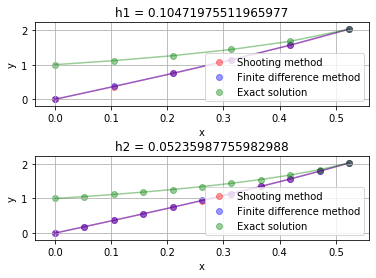

In [49]:
a = 0
b = PI / 6
alpha = 1
delta = 1
gamma = 0
beta = 0
y0 = 0.0
y1 = pureFunction(b)
step = PI / 30
eps = 1e-5

print(f'Interval: [{a}, {b}]')
print(f'y0 = {y0}, y1 = {y1}')
print()

res = []
res2 = []
ans = []
steps = [step, step / 2]
i = 0

for h in steps:
    print(f'Current step: {h}')
    print('Shooting method')
    res.append(shootingMethod(a, b, y0, y1, h, eps))
    for x, y in zip(res[i][0], res[i][1]):
        print(f'x: {round(x, 5)}, y: {round(y, 5)}')
    print()

    print('Finite difference method')
    res2.append(finiteDifferenceMethod(a, b, alpha, beta, delta, gamma, y0, y1, h))
    for x, y in zip(res2[i][0], res2[i][1]):
        print(f'x: {round(x, 5)}, y: {round(y, 5)}')
    print()

    ans.append({
        "h": h,
        "Shooting": {'x': res[i][0],  'y': res[i][1]},
        "FD":       {'x': res2[i][0], 'y': res2[i][1]}
    })

    i += 1

exact = []
for h in steps:
    x_ex = [i for i in np.arange(a, b + h, h)]
    y_ex = [pureFunction(i) for i in x_ex]
    exact.append((x_ex, y_ex))

err = rungeRomberg(ans, exact)
print("All errors")
print('Shooting method runge error: {}'.format(err['Shooting']))
print('Finite difference method runge error: {}'.format(err['FD']))
show(ans, exact, steps)